# Import Package

source : https://www.kaggle.com/c/GiveMeSomeCredit <br>
by Tito Tamaro<br>
sebagai _Final Project_ JCDS Purwadhika 2020

In [18]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

warnings.filterwarnings('ignore')
%matplotlib inline

# Functions

In [3]:
def dataframe_description(dataframe,samples=2): 
    bsDESC=[]
    for i in dataframe.columns:
        bsDESC.append([
            i, 
            dataframe[i].dtypes, 
            dataframe[i].isnull().sum(), 
            round((((dataframe[i].isnull().sum()) / (len(dataframe))) * 100),2),
            dataframe[i].nunique(), 
            dataframe[i].drop_duplicates().sample(samples).values,
            round(dataframe[i].mean(),2),
            round(dataframe[i].max(),2),
            round(dataframe[i].min(),2)
        ])
    dfDesc = pd.DataFrame(bsDESC,columns=['dataFeatures','dataType','nullValues','nullPercentage','unique','sample','mean','maxValues','minValues'])
    return dfDesc 

# Attributes Information

| Variable Name | Description | Type |
| --- | --- | --- |
|SeriousDlqin2yrs|Person experienced 90 days past due delinquency or worse|Y/N|
|RevolvingUtilizationOfUnsecuredLines|Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits|percentage|
|age|Age of borrower in years|integer|
|NumberOfTime30-59DaysPastDueNotWorse|Number of times borrower has been 30-59 days past due but no worse in the last 2 years.|integer|
|DebtRatio|Monthly debt payments| percentage|living costs divided by monthy gross income|percentage|
|MonthlyIncome|Monthly income|integer|
|NumberOfOpenCreditLinesAndLoans|Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)|integer|
|NumberOfTimes90DaysLate|Number of times borrower has been 90 days or more past due.|integer|
|NumberRealEstateLoansOrLines|Number of mortgage and real estate loans including home equity lines of credit|integer|
|NumberOfTime60-89DaysPastDueNotWorse|Number of times borrower has been 60-89 days past due but no worse in the last 2 years.|integer|
|NumberOfDependents|Number of dependents in family excluding themselves (spouse or children etc.)|integer|

Data merupakan kompetisi dari kaggle pada tahun 2011 (source: https://www.kaggle.com/c/GiveMeSomeCredit) dimana peserta diminta untuk memprediksi apakah peminjam uang akan mengalami _default_ (gagal bayar). Terdapat 3 csv di dalam bundle kompetisi ini yaitu csv_training yang merupakan data utama yang digunakan untuk model fitting, csv_test merupakan data yang memiliki semua features pada csv_training namun memiliki nilai kosong (NaN) pada features targetnya, dan terakhir adalah sample yang mana merupakan contoh data yang akan disubmit dalam komeptisi. Dalam project kali ini yang akan digunakan hanyalah <b>csv_training</b>

In [5]:
df_training = pd.read_csv('cs-training.csv')
df_training.rename(columns={'Unnamed: 0':'index'},inplace=True) # mengubah Unnamed features menjadi index
df_training = df_training.set_index('index')

df_test = pd.read_csv('cs-test.csv')
df_test.rename(columns={'Unnamed: 0':'index'},inplace=True) # mengubah Unnamed features menjadi index
df_test = df_test.set_index('index')

df_sample = pd.read_csv('sampleEntry.csv')

In [4]:
print(df_training.shape) # yang akan dipakai dalam project
print(df_test.shape)
print(df_sample.shape)

(150000, 11)
(101503, 11)
(101503, 2)


In [11]:
df_training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
index,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Data Description

In [5]:
dataframe_description(df_training)

,dataFeatures,dataType,nullValues,nullPercentage,unique,sample,mean,maxValues,minValues
0,SeriousDlqin2yrs,int64,0,0.00,2,"[1, 0]",0.07,1.0,0.0
1,RevolvingUtilizationOfUnsecuredLines,float64,0,0.00,125728,"[0.0044977509999999995, 0.218347707]",6.05,50708.0,0.0
2,age,int64,0,0.00,86,"[91, 47]",52.30,109.0,0.0
3,NumberOfTime30-59DaysPastDueNotWorse,int64,0,0.00,16,"[7, 8]",0.42,98.0,0.0
4,DebtRatio,float64,0,0.00,114194,"[0.251163753, 0.442926179]",353.01,329664.0,0.0
5,MonthlyIncome,float64,29731,19.82,13594,"[2064.0, 9895.0]",6670.22,3008750.0,0.0
6,NumberOfOpenCreditLinesAndLoans,int64,0,0.00,58,"[45, 41]",8.45,58.0,0.0
7,NumberOfTimes90DaysLate,int64,0,0.00,19,"[9, 11]",0.27,98.0,0.0
8,NumberRealEstateLoansOrLines,int64,0,0.00,28,"[14, 12]",1.02,54.0,0.0
9,NumberOfTime60-89DaysPastDueNotWorse,int64,0,0.00,13,"[5, 2]",0.24,98.0,0.0


Dari deskripsi di atas, features dapat dikelompokkan menjadi :

- <b>Numerical Values</b>

    - RevolvingUtilizationOfUnsecuredLines
    - age
    - NumberOfTime30-59DaysPastDueNotWorse
    - DebtRatio
    - MonthlyIncome
    - NumberOfOpenCreditLinesAndLoans
    - NumberOfTimes90DaysLate
    - NumberRealEstateLoansOrLines
    - NumberOfTime60-89DaysPastDueNotWorse
    - NumberOfDependents
    
    
- <b>Categorical Values</b>

    - SeriousDlqin2yrs ==> <b>Target</b>

## Data Distribution - Numerical 

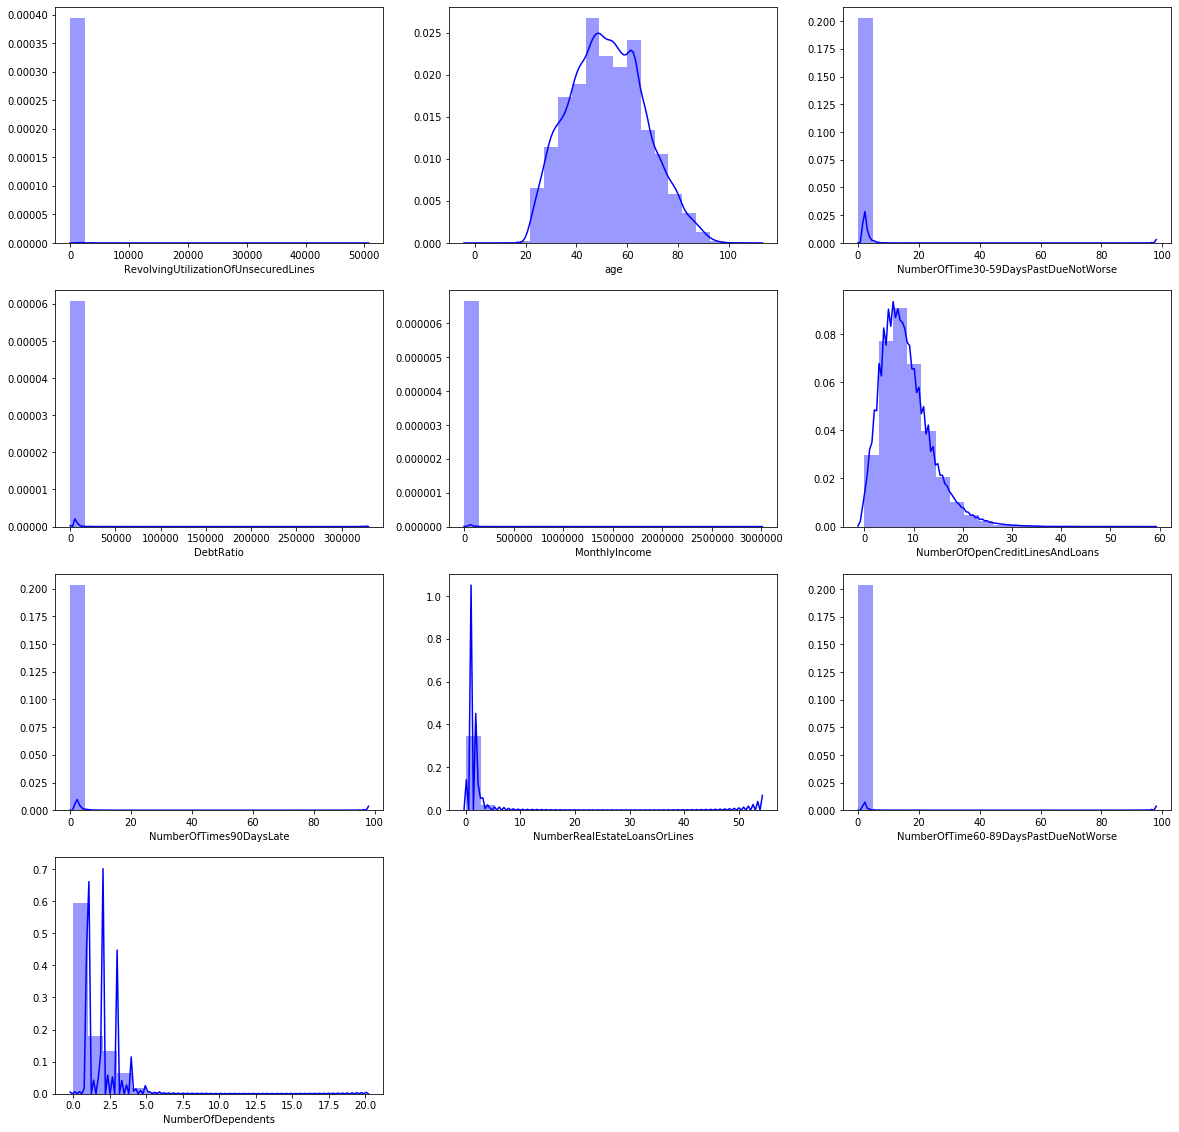

In [6]:
col = df_training.drop(['SeriousDlqin2yrs'],axis=1)
columnList = list(col)
columnList

fig = plt.figure(figsize=[20,20])
for j,i in zip(columnList,range(1,11)):
    axes = fig.add_subplot(4,3,i)
    sns.distplot(df_training[j],bins=20,ax=axes, color='blue') # jumlah bins 1/10 jumlah data
plt.show()

Hampir semua features memiliki <b>skewed distribution</b>, hal ini mengindikasikan adanya outlier pada features oleh karena itu dibutuhkan tools lain (seperti boxplot) untuk bisa mendeteksi adanya outlier secara lebih akurat. Selain itu dengan persebaran data seperti ini imputasi akan lebih tepat bila menggunakan <b>median data</b>

## Boxplot

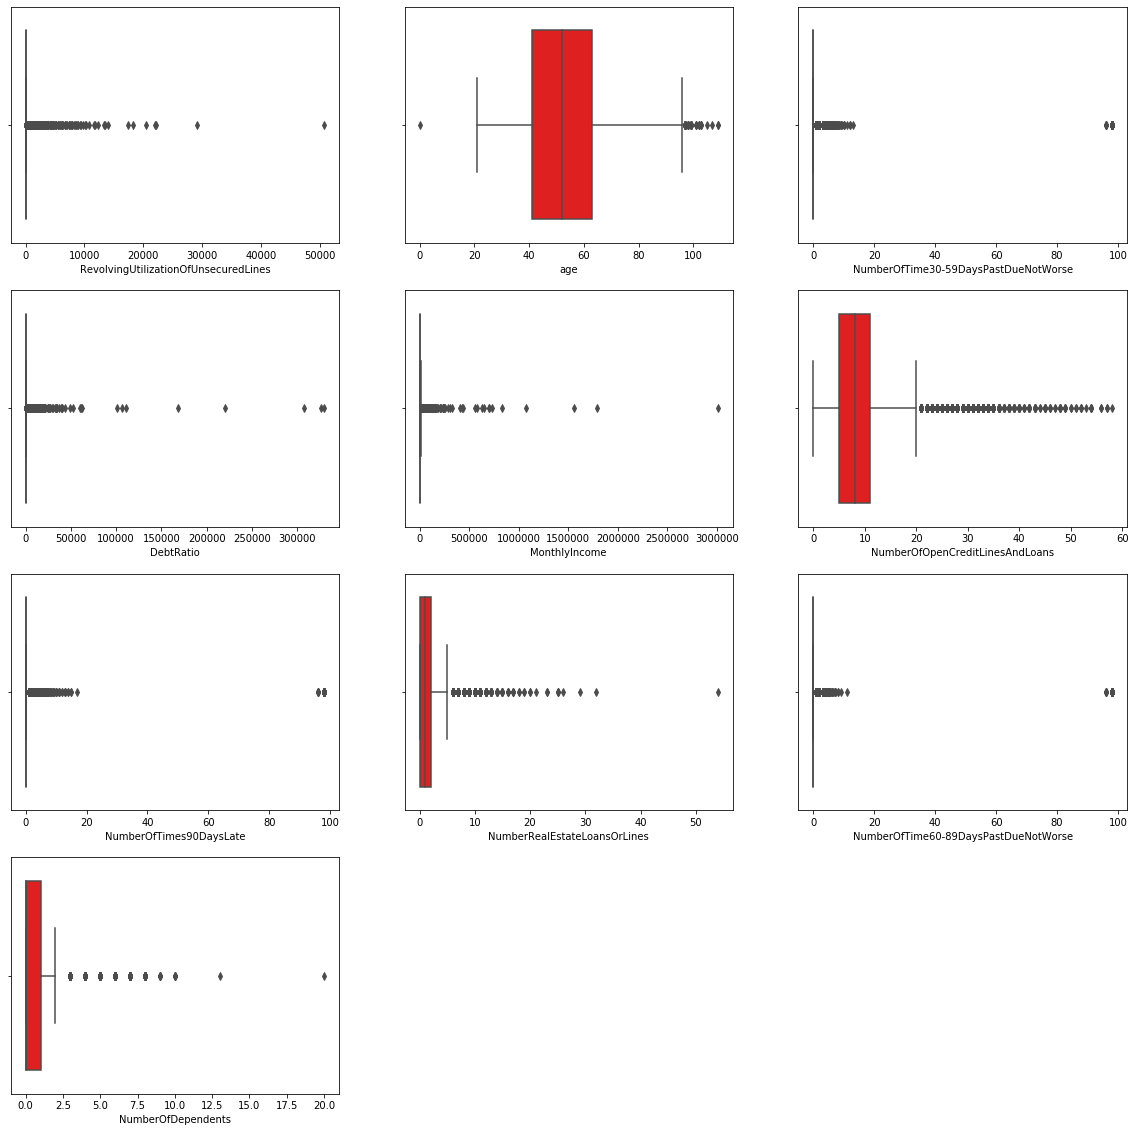

In [7]:
col = df_training.drop(['SeriousDlqin2yrs'],axis=1)
columnList = list(col)
columnList

fig = plt.figure(figsize=[20,20])
for j,i in zip(columnList,range(1,11)):
    axes = fig.add_subplot(4,3,i)
    sns.boxplot(df_training[j],ax=axes, color='red')
plt.show()

Dari boxplot ditemukan semua features memiliki <b>outlier</b>. Oleh karena itu dibutuhkan outlier handling untuk setiap features, pada project ini akan dibandingkan bagaimana performa model dengan dan tanpa outlier handling dan kemudian akan dipilih yang memiliki performa terbaik. Hal ini akan dibahas lebih dalam pada bagian outlier handling

## Data Distribution - Categorical

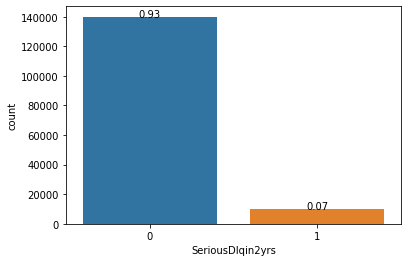

In [8]:
ax = sns.countplot(df_training['SeriousDlqin2yrs'])
total = len(df_training)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

Satu-satunya jenis data categorical dalam dataset ini adalah features 'SeriousDlqin2yrs' yang mana juga menjadi kolom target. Features ini berisi nilai 0 dan 1 yang menentukan apakah seorang pengguna kredit akan mengalami _default_ / gagal bayar dalam 2 tahun kedepan. <br>
Dari jumlahnya dapat dilihat bahwa features target <b>imbalanced<b>

# NaN Values

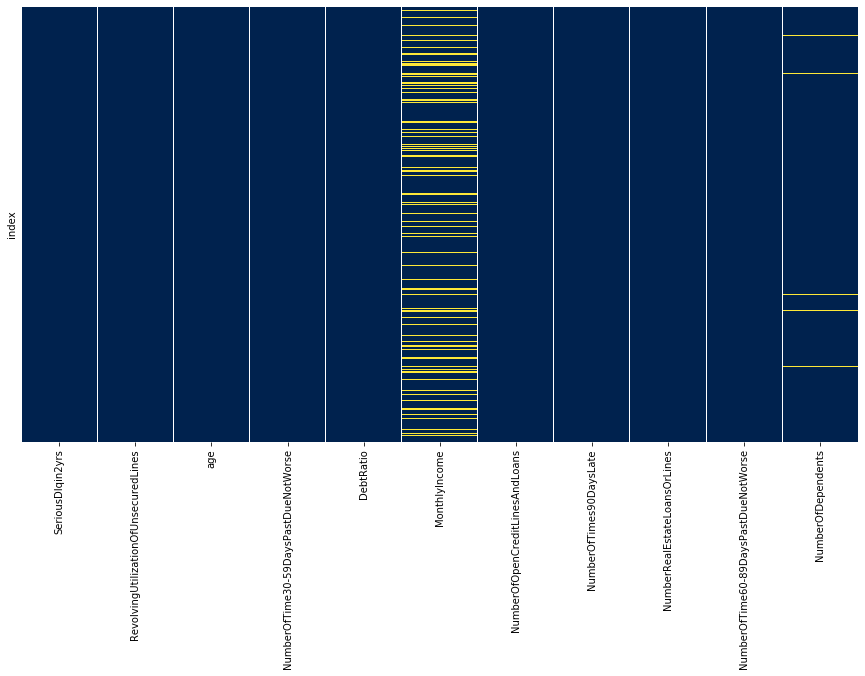

In [9]:
plt.figure(figsize=(15,8))

sns.heatmap(df_training.isna(), yticklabels=False, cmap='cividis', cbar=False)
plt.show()

In [10]:
df_training.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
29731/len(df_training)*100

19.820666666666668

In [8]:
3924/len(df_training)*100

2.616

Terdapat 29731 atau 19.82% NaN Values pada features MonthlyIncome<br>
Terdapat 3924 atau 2.62 % NaN Values pada features MonthlyIncome

#### Pengaruh NaN Values terhadap Target

In [11]:
df_training['nullValuesMI'] = pd.isnull(df_training['MonthlyIncome'])
df1 = pd.crosstab(index=df_training.nullValuesMI, columns=df_training.SeriousDlqin2yrs, values=df_training.nullValuesMI,aggfunc='count',normalize='all')
df1

SeriousDlqin2yrs,0,1
nullValuesMI,,
False,0.74608,0.055713
True,0.18708,0.011127


NaN Values pada features Monthly Income memiliki persentase 18,7% pada nilai target 0 dan 1,1% pada nilai target 1 

In [12]:
df_training['nullValuesND'] = pd.isnull(df_training['NumberOfDependents'])
df2 = pd.crosstab(index=df_training.nullValuesND, columns=df_training.SeriousDlqin2yrs, values=df_training.nullValuesND,aggfunc='count',normalize='all')
df2

SeriousDlqin2yrs,0,1
nullValuesND,,
False,0.908193,0.065647
True,0.024967,0.001193


NaN Values pada features Number Of Dependents memiliki persentase 2,4% pada nilai target 0 dan 0.1 % pada nilai target 1

Berdarkan nilai diatas akan dilakukan 3 metode imputasi lalu akan diambil yang memiliki performa modelling terbaik, yaitu :
1. Mengganti NaN value dengan median seluruh data
2. Mengganti NaN value dengan nilai -999
3. Mengganti NaN value dengan median namun setelah dikelompokkan berdasarkan features yang lain

Drop value tidak dilakukan karena akan mengubah data dalam jumlah besar (hampir 20% data akan hilang apabila semua NaN value di drop)<br>
Imputasi data akan dilakukan saat data sudah di split dalam bagian modelling. Hal ini dilakukan untuk mencegah <b>Data Leakage</b>

## Univariate Analysis

Dalam bagian ini akan dibahas pengaruh setiap features terhadap target, pembahasan akan dilakukan terpisah antara features yang satu dengan yang lain

### SeriousDlqin2yrs (Target)

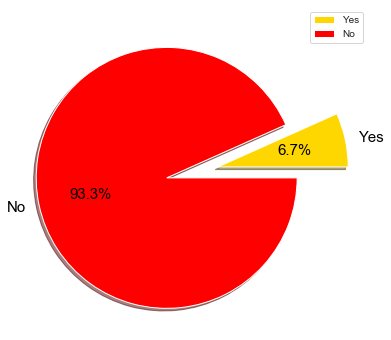

In [10]:
y = (len(df_training[df_training['SeriousDlqin2yrs']==1])/len(df_training))*100
n = (len(df_training[df_training['SeriousDlqin2yrs']!=1])/len(df_training))*100
persentase = [y,n]
nama = ['Yes','No']

plt.figure(figsize=(7,6))
plt.pie(
    persentase, 
    labels=nama,
    colors=['gold','red'],
    startangle= 0,
    shadow=True,
    textprops={
        'size':15 ,
        'color':'k'
    },
    autopct='%1.1f%%', # float format
    explode=(.1,0.3)
)
plt.legend()
plt.show()

Terdapat 6.7% nasabah yang mengalami _default_ / gagal bayar, dan sisanya yaitu 93.3% tidak. Ketimpangan jumlah ini menandakan adanya <b>imbalance data</b> dan dibutuhkan imbalance data handling pada tahap modelling.

### RevolvingUtilizationOfUnsecuredlines vs Target

In [29]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns=['RUUL'], values=df_training.RevolvingUtilizationOfUnsecuredLines, aggfunc=['mean','median'])

,mean,median
col_0,RUUL,RUUL
SeriousDlqin2yrs,,
0,6.168855,0.133288
1,4.367282,0.838853


Feature RevolvingUtilizationOfUnsecuredlines merupakan fitur yang menggambarkan rasio kredit yang dipakai terhadap limit kredit. Idealnya nilai fitur ini bernilai <30 % dimana angka ini dinilai baik dan semakin kecil jumlah kredit yang dipakai akan semakin baik.
Berdasarkan tabel diatas, menggambarkan bahwa customer yang mengalami default memiliki median RUUL sebesar 83%, sementara yang tidak mengalami default memiliki median RUUL sebesar 13.3%. Mean di atas tidak digunakan dalam analisis data karena distribusi data _highly skewed_, sehingga nilai median lebih representatif untuk menganalisis data. Nilai mean di atas ditampilkan hanya sebagai pelengkap saja

### Age vs Target

In [30]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns=['Age'], values=df_training.age, aggfunc=['mean','median'])

,mean,median
col_0,Age,Age
SeriousDlqin2yrs,,
0,52.751375,52
1,45.926591,45


In [31]:
# binning data by interval 10
bins = [-1,21,31,41,51,61,71,81,91,101,111] # binning dengan interval 10 kecuali yang pertama karena hanya ditemukan 1 data dengan age 0 (outlier)
label = ['(0-20)','(21-30)','(31-40)','(41-50)','(51-60)','(61-70)','(71-80)','(81-90)','(91-100)','(101-111)'] # label umur
df_training['binned_age']=pd.cut(df_training['age'],bins=bins,labels=label)

In [37]:
pd.crosstab(index=df_training.binned_age, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_age                          
(0-20)            0.001140  0.000087
(21-30)           0.074427  0.009653
(31-40)           0.153040  0.016447
(41-50)           0.217800  0.019147
(51-60)           0.217667  0.013673
(61-70)           0.164860  0.005460
(71-80)           0.077087  0.001767
(81-90)           0.024947  0.000567
(91-100)          0.002127  0.000040
(101-111)         0.000067  0.000000

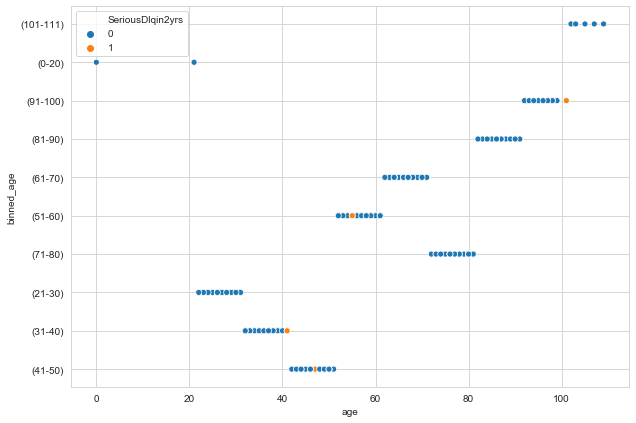

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_training.age,y=df_training.binned_age,hue=df_training.SeriousDlqin2yrs,data=df_training)
plt.show()

Data age merupakan satu-satunya features yang memiliki bentuk distribusi mendekati distribusi normal, oleh karena itu baik nilai mean ataupun median dapat digunakan sebagai analisis. Rata-rata usia yang mengalami gagal bayar adalah usia 45 tahun, dan yang tidak adalah 52 tahun. Kesimpulan ini kurang bermanfaat dalam analisis oleh karena itu usia akan dikelompokkan agar dapat dilihat kelompok usia mana yang paling banyak mengalami gagal bayar. Dari hasil pengelompokkan dapat dilihat bahwa kelompok usia 41-50 tahun paling banyak mengalami gagal bayar dengan persentase 19.1% terhadap keseluruhan data. Dari scatterplot di atas dapat dilihat juga kecenderungan gagal bayar dimulai terdeteksi pada customer dengan usia 40 tahun ke atas.

### NumberOfTime30-59DaysPastDueNotWorse vs Target

In [48]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns='NT3059', values=df_training['NumberOfTime30-59DaysPastDueNotWorse'], aggfunc=['mean','median'])

,mean,median
col_0,NT3059,NT3059
SeriousDlqin2yrs,,
0,0.280109,0
1,2.388490,0


In [52]:
print(df_training['NumberOfTime30-59DaysPastDueNotWorse'].max())
print(df_training['NumberOfTime30-59DaysPastDueNotWorse'].min())

98
0


In [55]:
# binning data
bins = [-1,4,8,12,16,20,24,91,101] # binning dengan interval 3, kecuali dari nilai 90 keatas(terdapat kekosongan data pada interval 27 sampai 90)  
label = ['(0-3)','(4-7)','(8-11)','(12-15)','(16-19)','(20-23)','(24-27)','(27-100)'] # label
df_training['binned_NT3059']=pd.cut(df_training['NumberOfTime30-59DaysPastDueNotWorse'],bins=bins,labels=label)

In [56]:
pd.crosstab(index=df_training.binned_NT3059, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_NT3059                       
(0-3)             0.930300  0.064033
(4-7)             0.001980  0.001760
(8-11)            0.000067  0.000060
(12-15)           0.000000  0.000007
(27-100)          0.000813  0.000980

Features NumberOfTime30-59DaysPastDueNotWorse bernilai bilangan bulat yang menyatakan berapa kali customer mengalami keterlambatan bayar dalam kurun waktu 30-59 hari. Dalam tabel ditemukan nilai median 0, hal ini disebabkan karena banyaknya nilai 0 pada features ini yang berarti customer tersebut tidak mengalami keterlambatan bayar. Selanjutnya data ini di binning dengan interval 3 poin, terdapat kekosongan data pada interval 27 sampai 90 sehingga terdapat loncatan dalam pengelompokannya. Dari tabel diatas diketahui kelompok customer dengan nilai NumberOfTime30-59DaysPastDueNotWorse 0-3 merupakan yang paling sering mengalami gagal bayar.

### DebtRatio vs Target

In [57]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns='DR', values=df_training['DebtRatio'], aggfunc=['mean','median'])

,mean,median
col_0,DR,DR
SeriousDlqin2yrs,,
0,357.151168,0.362659
1,295.121066,0.428227


In [65]:
print(df_training['DebtRatio'].max())
print(df_training['DebtRatio'].min())

329664.0
0.0


In [73]:
# binning data
bins = [-1,3,6,9,12,15,18,21,101,501,1001,5001,329665] 
label = ['(0-2)','(3-5)','(6-8)','(9-11)','(12-14)','(15-17)','(18-20)','(21-100)','(101-500)','(501-1000)','(1001-5000)','(5001-329664)'] # label 
df_training['binned_DR']=pd.cut(df_training['DebtRatio'],bins=bins,labels=label)

In [74]:
pd.crosstab(index=df_training.binned_DR, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_DR                           
(0-2)             0.742480  0.055633
(3-5)             0.005247  0.000293
(6-8)             0.002833  0.000140
(9-11)            0.002393  0.000073
(12-14)           0.002133  0.000107
(15-17)           0.001613  0.000080
(18-20)           0.001827  0.000087
(21-100)          0.021640  0.001047
(101-500)         0.023000  0.002067
(501-1000)        0.022953  0.001787
(1001-5000)       0.097913  0.004787
(5001-329664)     0.009127  0.000740

Debt Ratio merupakan rasio jumlah tagihan yang harus dibayarkan terhadap total kredit. Seharusnya nilai ini dibawah 1 / 100% namun ditemukan nilai diatas 1 bahkan sampai di angka 329664, hal ini dapat terjadi karena kesalahan input data ataupun keterlambatan bayar. Nilai yang dipakai dalam analisis adalah nilai median karena data distribusi features ini _highly skewed_. Pada tabel nilai 42% keatas untuk DR merupakan kelompok customer yang mengalami gagal bayar, sementara nilai 36% kebawah merupakan kelompok customer yang tidak. FICO sendiri memberikan standard bahwa nilai DR yang baik ada di angka 30 %
Data ini bisa dibuat lebih jelas dengan metode binning, dimana pengelompokkan dijadikan per 2 poin. Dalam tabel kelompok DR 0-2 merupakan kelompok customer yang paling banyak mengalami gagal bayar sebanyak 5,5%, ditemukan juga kelompok customer yang mengalami gagal bayar pada kelompok DR > 21. Dari definisinya tidak mungkin nilai DR bisa mencapai ribuan  

### MonthlyIncome vs Target

In [61]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns='MI', values=df_training['MonthlyIncome'], aggfunc=['mean','median'])

,mean,median
col_0,MI,MI
SeriousDlqin2yrs,,
0,6747.837774,5466.0
1,5630.826493,4500.0


In [62]:
print(df_training['MonthlyIncome'].max())
print(df_training['MonthlyIncome'].min())

3008750.0
0.0


In [63]:
# binning data menjadi 3 kelompok
bins = [-1,50001,150001,3008751] # binning menjadi 3 kelompok
label = ['(0-50000)','(50001-150000)','(150001-3008750)'] # label 
df_training['binned_MI']=pd.cut(df_training['MonthlyIncome'],bins=bins,labels=label)

In [64]:
pd.crosstab(index=df_training.binned_MI, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_MI                           
(0-50000)         0.928153  0.069345
(50001-150000)    0.002070  0.000125
(150001-3008750)  0.000291  0.000017

Pada features MonthlyIncome, customer yang paling banyak mengalami default atau gagal bayar adalah kelompok Monthly Income dibawah 50000 yaitu sebanyak 6.9%. Dari tabel ini juga dapat diperoleh hubungan semakin besar nilai MI maka akan semakin kecil kemungkinannya untuk default

### NumberOfOpenCreditLinesAndLoans vs Target

In [75]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns='NOCLL', values=df_training['NumberOfOpenCreditLinesAndLoans'], aggfunc=['mean','median'])

,mean,median
col_0,NOCLL,NOCLL
SeriousDlqin2yrs,,
0,8.493620,8
1,7.882306,7


In [76]:
print(df_training['NumberOfOpenCreditLinesAndLoans'].max())
print(df_training['NumberOfOpenCreditLinesAndLoans'].min())

58
0


In [77]:
# binning data 
bins = [-1,11,21,31,41,51,59] # binning dengan interval 10
label = ['(0-10)','(11-20)','(21-30)','(31-40)','(41-50)','(51-58)'] # label 
df_training['binned_NOCLL']=pd.cut(df_training['NumberOfOpenCreditLinesAndLoans'],bins=bins,labels=label)

In [78]:
pd.crosstab(index=df_training.binned_NOCLL, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_NOCLL                        
(0-10)            0.717153  0.051587
(11-20)           0.196693  0.013793
(21-30)           0.017593  0.001313
(31-40)           0.001380  0.000100
(41-50)           0.000267  0.000033
(51-58)           0.000073  0.000013

Pada features NumberOfOpenCreditLinesAndLoans yang memiliki distribusi _highly skewed_ memiliki median 7 untuk customer yang mengalami default dan 8 untuk yang tidak. Features ini mememuat data tentang berapa jumlah kredit lain yang dimiliki customer selain credit yang dipakai ini. Dari hasil pengelompokkan didapat kelompok customer dengan NOCLL 0-10 memiliki jumlah default paling banyak yaitu 5.1%. Diperoleh juga kecenderungan bahwa semakin banyak nilai NOCLL yang dimiliki maka akan semakin sedikit juga jumlah customer yang mengalami gagal bayar

### NumberOfTimes90DaysLate vs Target

In [79]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns='NT90', values=df_training['NumberOfTimes90DaysLate'], aggfunc=['mean','median'])

,mean,median
col_0,NT90,NT90
SeriousDlqin2yrs,,
0,0.135225,0
1,2.091362,0


In [81]:
print(df_training['NumberOfTimes90DaysLate'].max())
print(df_training['NumberOfTimes90DaysLate'].min())

98
0


In [82]:
# binning data
bins = [-1,4,8,12,16,20,24,91,101] # binning dengan interval 3, kecuali dari nilai 90 keatas(terdapat kekosongan data pada interval 27 sampai 90)  
label = ['(0-3)','(4-7)','(8-11)','(12-15)','(16-19)','(20-23)','(24-27)','(27-100)'] # label
df_training['binned_NT90']=pd.cut(df_training['NumberOfTimes90DaysLate'],bins=bins,labels=label)

In [83]:
pd.crosstab(index=df_training.binned_NT90, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_NT90                         
(0-3)             0.931620  0.064500
(4-7)             0.000620  0.001180
(8-11)            0.000073  0.000153
(12-15)           0.000033  0.000020
(16-19)           0.000000  0.000007
(27-100)          0.000813  0.000980

Features NT90 ini mirip dengan yang ada sebelumnya yaitu NT3059 dimana terdapat mencakup data berapa kali terjadi keterlambatan bayar oleh customer. Pada nilai median, features ini juga memiliki nilai 0 karena banyak terdapat data dengan nilai 0. Setelah dikelompokkan, customer dengan nilai NT90 0-3 memiliki jumlah default paling banyak yaitu 6.4%. Pada nilai max di features ini terdapat data dengan nilai sama yang juga terdapat pada NT3059 yaitu 98, hal ini mengindikasikan adanya kesalahan pada input data. Hal ini akan semakin diperkuat apabila ditemukan kembali hal yang sama pada feature yang serupa berikutnya. 

### NumberRealEstateLoansOrLines vs Target

In [84]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns='NRELL', values=df_training['NumberRealEstateLoansOrLines'], aggfunc=['mean','median'])

,mean,median
col_0,NRELL,NRELL
SeriousDlqin2yrs,,
0,1.020368,1
1,0.988530,1


In [85]:
print(df_training['NumberRealEstateLoansOrLines'].max())
print(df_training['NumberRealEstateLoansOrLines'].min())

54
0


In [86]:
# binning data
bins = [-1,11,21,31,41,51,55] # binning dengan interval 10 
label = ['(0-10)','(11-20)','(21-30)','(31-40)','(41-50)','(51-54)'] # label
df_training['binned_NRELL']=pd.cut(df_training['NumberRealEstateLoansOrLines'],bins=bins,labels=label)

In [87]:
pd.crosstab(index=df_training.binned_NRELL, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_NRELL                        
(0-10)            0.932813  0.066713
(11-20)           0.000300  0.000113
(21-30)           0.000033  0.000013
(31-40)           0.000007  0.000000
(51-54)           0.000007  0.000000

Features ini mencakup data berapa banyak kredit/pinjaman yang dimiliki customer dalam properti. Features ini memiliki median 1, setelah pengelompokkan customer dengan nilai NRELL 0-10 memiiki jumlah customer yang paling banyak mengalami default yaitu 6.67%. Selain itu ditemukan juga kecenderungan bahwa semakin banyak nilai NRELL yang dimiliki oleh customer maka akan semakin kecil juga jumlah yang mengalami default.

### NumberOfTime60-89DaysPastDueNotWorse vs Target

In [88]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns='NT6089', values=df_training['NumberOfTime60-89DaysPastDueNotWorse'], aggfunc=['mean','median'])

,mean,median
col_0,NT6089,NT6089
SeriousDlqin2yrs,,
0,0.126666,0
1,1.828047,0


In [89]:
print(df_training['NumberOfTime60-89DaysPastDueNotWorse'].max())
print(df_training['NumberOfTime60-89DaysPastDueNotWorse'].min())

98
0


In [90]:
# binning data
bins = [-1,4,8,12,16,20,24,91,101] # binning dengan interval 3, kecuali dari nilai 90 keatas(terdapat kekosongan data pada interval 27 sampai 90)  
label = ['(0-3)','(4-7)','(8-11)','(12-15)','(16-19)','(20-23)','(24-27)','(27-100)'] # label
df_training['binned_NT6089']=pd.cut(df_training['NumberOfTime60-89DaysPastDueNotWorse'],bins=bins,labels=label)

In [92]:
pd.crosstab(index=df_training.binned_NT6089, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_NT6089                       
(0-3)             0.932193  0.065593
(4-7)             0.000147  0.000260
(8-11)            0.000007  0.000007
(27-100)          0.000813  0.000980

Features ini mencakup data berapa kali customer mengalami keterlambatan bayar dalam kurun waktu 60-89 hari. Hal yang sama ditemukan pada features ini,NT90,dan NT3059 dimana kesemuanya memiliki median 0 yang disebabkan oleh banyaknya data yang bernilai 1. Lalu diperoleh juga nilai max yang sama yaitu 98, pada proses Outlier Handling nilai ini akan didrop karena mengindikasikan salah input (tercantum pada ketiga features dan nilainya tidak masuk akal).
Pada features ini kelompok customer dengan nilai NT6089 0-3 yang memiliki jumlah default paling banyak yaitu sebesar 6.5%

### NumberOfDependents vs Target

In [93]:
pd.crosstab(index=df_training.SeriousDlqin2yrs, columns='ND', values=df_training['NumberOfDependents'], aggfunc=['mean','median'])

,mean,median
col_0,ND,ND
SeriousDlqin2yrs,,
0,0.743417,0.0
1,0.948208,0.0


In [94]:
print(df_training['NumberOfDependents'].max())
print(df_training['NumberOfDependents'].min())

20.0
0.0


In [95]:
# binning data
bins = [-1,5,10,15,21] # binning dengan interval 5  
label = ['(0-5)','(6-10)','(11-15)','(15-21)'] # label
df_training['binned_ND']=pd.cut(df_training['NumberOfDependents'],bins=bins,labels=label)

In [96]:
pd.crosstab(index=df_training.binned_ND, columns=df_training.SeriousDlqin2yrs, values=df_training.SeriousDlqin2yrs, aggfunc=['count'],normalize=True)

count          
SeriousDlqin2yrs         0         1
binned_ND                           
(0-5)             0.931125  0.067198
(6-10)            0.001451  0.000212
(11-15)           0.000007  0.000000
(15-21)           0.000007  0.000000

Features ini mencakup data yang menunjukkan berapa jumlah tanggungan (anak, keluarga, dll.) yang dimiliki oleh customer. Pada nilai median features ini memiliki nilai 0, hal ini sama dengan features sebelumnya disebabkan oleh banyaknya data dengan nilai 0. Kelompok customer dengan nilai ND 0-5 memiliki jumlah default paling banyak yaitu 6.7%. Terdapat kecenderungan semakin banyak jumlah dependents yang dimiliki oleh customer maka semakin kecil jumlah customer yang mengalami default. 

## Bivariate Analysis

Sebelum dilakukan bivariate analysis, kolom yang tidak dibutuhkan akan didrop terlebih dahulu

In [100]:
df_training.drop(['binned_age','binned_NT3059','binned_MI','binned_DR','binned_NOCLL','binned_NT90','binned_NRELL','binned_NT6089','binned_ND'],axis=1,inplace=True)?

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
index,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Correlation Matrix

(11, 0)

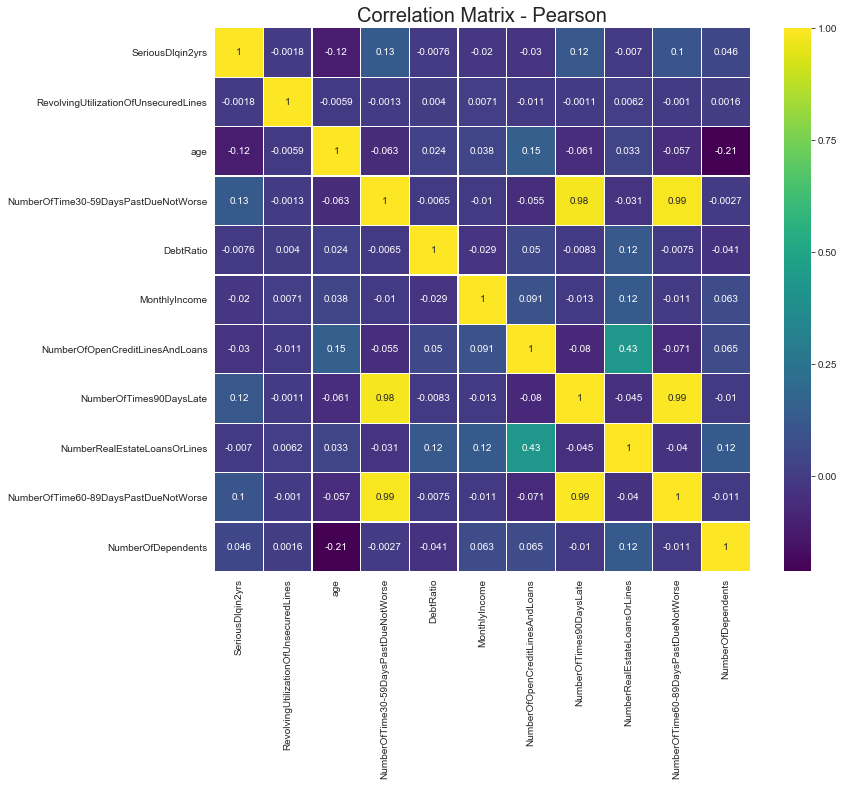

In [103]:
plt.figure(figsize=(12,10))
plt.title('Correlation Matrix - Pearson',size=20)
x = sns.heatmap(df_training.corr(),annot=True,linewidths=0.2,cmap='viridis')
x.set_ylim(11,0)

- Korelasi positif terkuat terhadap target terdapat pada features NumberOfTime30-59DaysPastDueNotWorse yaitu sebesar 0.13. Selain itu kekuatan korelasi yang sama ditemukan juga pada features NumberOfTimes90DaysLate sebesar 0.12 dan NumberOfTime60-89DaysPastDueNotWorse sebesar 1. Dari hal ini dapat disimpulkan bahwa adanya keterlambatan pembayaran kredit memiliki korelasi yang kuat dengan customer yang default

- Korelasi negatif terkuat terhadap terget terdapat pada features age yaitu sebesar -0.12. Hal ini menandakan bahwa semakin besar usia seorang customer maka semakin jumlahnya yang mengalami default.